In [2]:
import os
import pandas as pd
import numpy as np

# 文件夹路径
folder_path = '/Users/li/Desktop/task-persuade/behavdata/during_scan_rate_data'


In [44]:

# sub-19
sub_lists = [[1,2,3,4,5,6,7],
             [8,9,10,11,12,13,20],
             [14,15,16,17,18,19,21],
             [22,23,24,25,26,27,28],
             [29,30,31,32,33,34,35]]

# 这是运行的顺序
# run_lists = [[1,2,3,4,5],
#             [2,3,4,5,1],
#             [3,4,5,1,2],
#             [4,5,1,2,3],
#             [5,1,2,3,4]]

# # # day1的run1对应day2的run5
# run_lists = [[1,2,3,4,5],
#             [5,1,2,3,4],
#             [4,5,1,2,3],
#             [3,4,5,1,2],
#             [2,3,4,5,1]]

run_lists = [[1,2,3,4,5],
            [1,2,3,4,5],
            [1,2,3,4,5],
            [1,2,3,4,5],
            [1,2,3,4,5]]

subs_pre_rate, subs_post_rate = [],[]

for day in list(range(5)):
    
    sub_list = sub_lists[day]
    run_list = run_lists[day]
    
    for sub in sub_list:
        sub_pre_rate, sub_post_rate = [], []
        for run in run_list:
            file = os.path.join(folder_path, f'sub_{sub}_run_{run}.csv')
            df = pd.read_csv(file)
            pre_ratings = list(df[df['Condition'].str.contains('Pre-video')]['Rating'])
            post_ratings = list(df[df['Condition'].str.contains('Post-video')]['Rating'])
            sub_pre_rate.extend(pre_ratings)
            sub_post_rate.extend(post_ratings)
        subs_pre_rate.append(sub_pre_rate)
        subs_post_rate.append(sub_post_rate)
        
subs_pre_rate = np.array(subs_pre_rate)
subs_post_rate = np.array(subs_post_rate)
subs_attitude_change = subs_post_rate - subs_pre_rate

Text(99.72222222222221, 0.5, 'Subject')

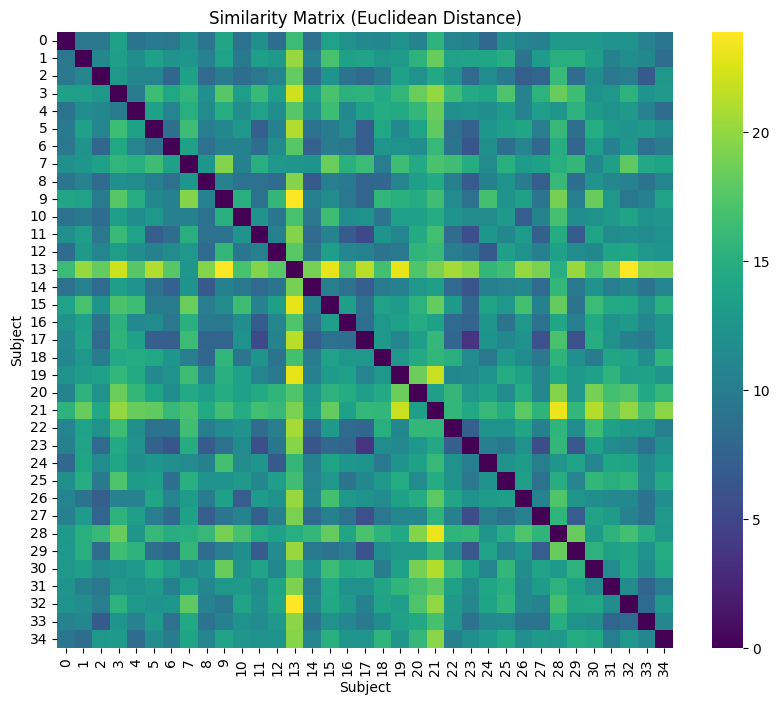

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

distances = pdist(subs_attitude_change, metric='euclidean')
change_distance_matrix = squareform(distances)

plt.figure(figsize=(10, 8))
sns.heatmap(change_distance_matrix, cmap='viridis', annot=False, square=True)

plt.title("Similarity Matrix (Euclidean Distance)")
plt.xlabel("Subject")
plt.ylabel("Subject")

Text(99.72222222222221, 0.5, 'Subject')

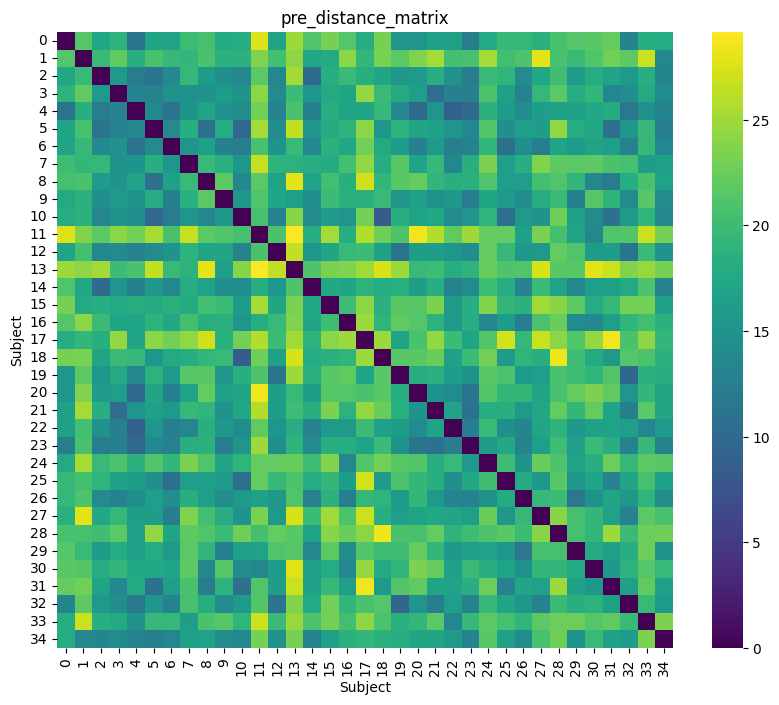

In [46]:

distances = pdist(subs_pre_rate, metric='euclidean')
pre_distance_matrix = squareform(distances)

plt.figure(figsize=(10, 8))
sns.heatmap(pre_distance_matrix, cmap='viridis', annot=False, square=True)

plt.title("pre_distance_matrix")
plt.xlabel("Subject")
plt.ylabel("Subject")

Text(99.72222222222221, 0.5, 'Subject')

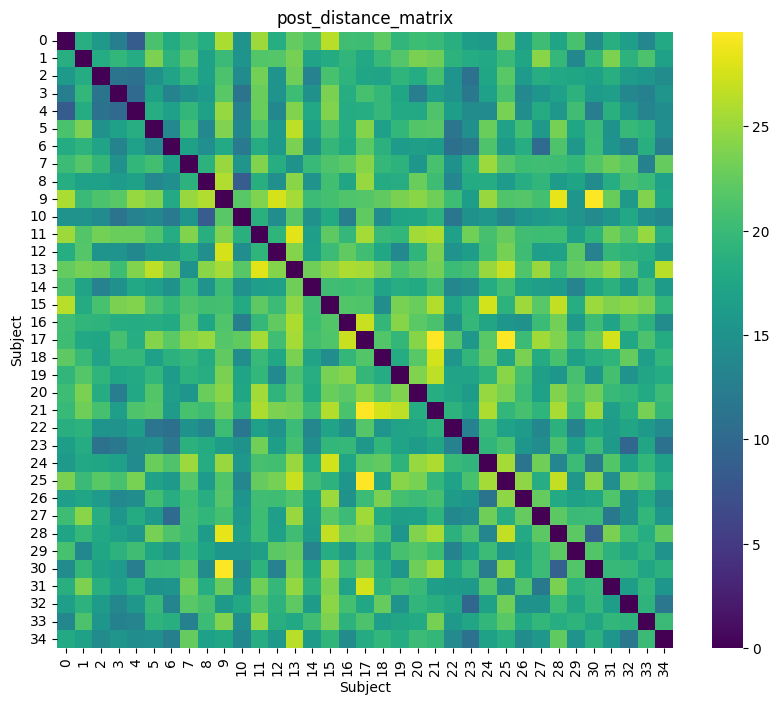

In [47]:
distances = pdist(subs_post_rate, metric='euclidean')
post_distance_matrix = squareform(distances)

plt.figure(figsize=(10, 8))
sns.heatmap(post_distance_matrix, cmap='viridis', annot=False, square=True)

plt.title("post_distance_matrix")
plt.xlabel("Subject")
plt.ylabel("Subject")

In [53]:

columns = ['sub'] + [f'topic{i}-pre' for i in range(1, 16)]
subs_id = [1,2,3,4,5,6,7,
             8,9,10,11,12,13,20,
             14,15,16,17,18,19,21,
             22,23,24,25,26,27,28,
             29,30,31,32,33,34,35]

df = pd.DataFrame(subs_pre_rate, columns=columns[1:])
df.insert(0, 'sub', subs_id)
df_sorted = df.sort_values(by='sub')
df_sorted = df_sorted.reset_index(drop=True)

out_file = '/Users/li/Desktop/task-persuade/behavdata/subs_pre_attitude.csv'
df_sorted.to_csv(out_file, index=False)


In [51]:

df = pd.DataFrame(subs_post_rate, columns=columns[1:])

df.insert(0, 'sub', subs_id)
df_sorted = df.sort_values(by='sub')
df_sorted = df_sorted.reset_index(drop=True)

out_file = '/Users/li/Desktop/task-persuade/behavdata/subs_post_attitude.csv'
df_sorted.to_csv(out_file, index=False)


In [52]:

df = pd.DataFrame(subs_attitude_change, columns=columns[1:])

df.insert(0, 'sub', subs_id)
df_sorted = df.sort_values(by='sub')
df_sorted = df_sorted.reset_index(drop=True)

out_file = '/Users/li/Desktop/task-persuade/behavdata/subs_attitude_change.csv'
df_sorted.to_csv(out_file, index=False)
